In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, f1_score

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

X, y = mnist.data, mnist.target
print(f"Formato original dos dados (X): {X.shape}")
print(f"Formato original do alvo (y): {y.shape}")

np.random.seed(0)
choiced = np.random.choice(range(len(y)),size=int(len(y)/10), replace=False)
X, y = X[choiced], y[choiced]

print(f"Formato original dos dados (X): {X.shape}")
print(f"Formato original do alvo (y): {y.shape}")

Formato original dos dados (X): (70000, 784)
Formato original do alvo (y): (70000,)
Formato original dos dados (X): (7000, 784)
Formato original do alvo (y): (7000,)


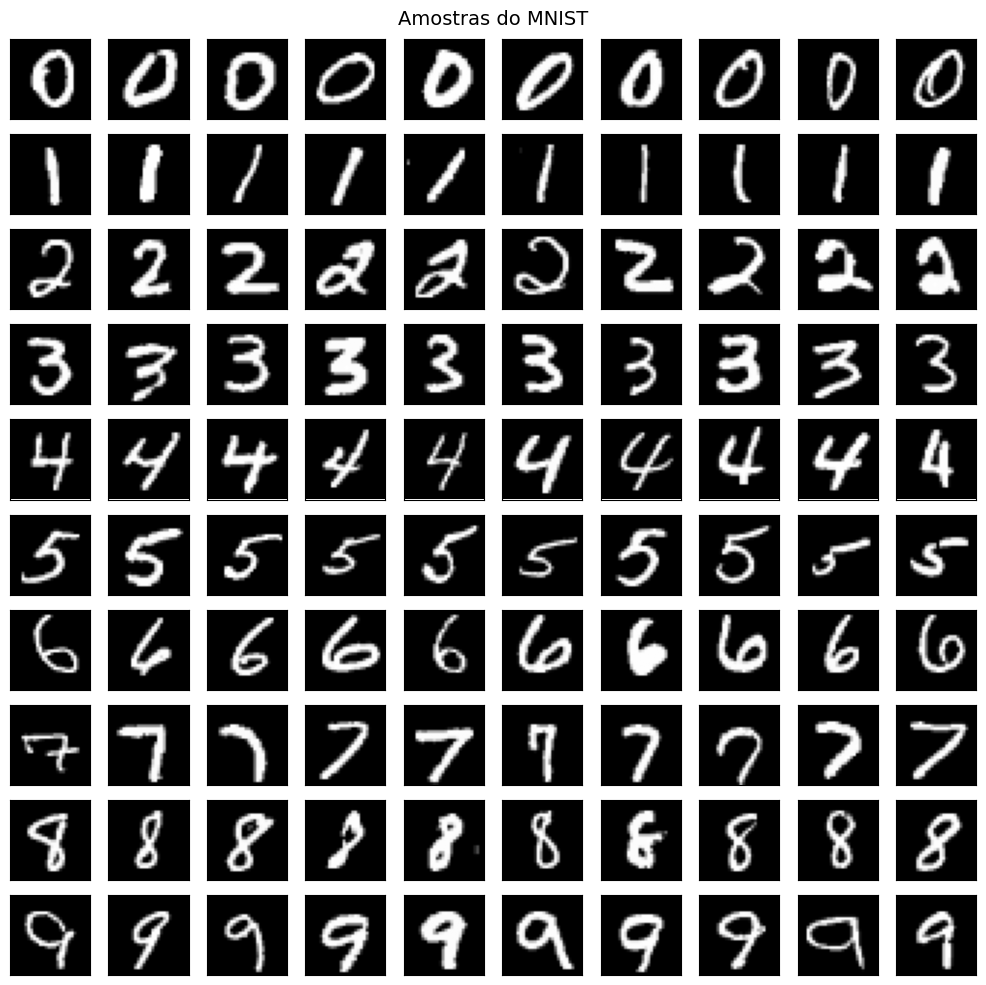

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
  ind = np.where(y==str(i))[0][:10]
  for j in range(10):
    ax[i, j].imshow(X[ind[j],:].reshape(28, 28), cmap='gray')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
plt.suptitle("Amostras do MNIST", fontsize=14)
plt.tight_layout()
plt.savefig('mnist.svg',bbox_inches='tight')
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=0, stratify=y)

print(f"Usando {X_train.shape[0]} amostras para treino.")
print(f"Usando {X_test.shape[0]} amostras para teste.")

Usando 5250 amostras para treino.
Usando 1750 amostras para teste.


In [4]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
perfo_svm = {}
for c in [0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100, 1000]:
  print(f'Regularização C = {c}')
  svm_model = SVC(kernel='rbf', C=c, gamma='scale', random_state=0)

  start_time = time.time()
  svm_model.fit(X_train_scaled, y_train)
  end_time = time.time()
  print(f"Tempo de treinamento do SVM: {end_time - start_time:.2f} segundos")

  y_pred_svm = svm_model.predict(X_test_scaled)

  perfo_svm[c] = {'Acurácia':balanced_accuracy_score(y_test, y_pred_svm),
                  'f1-score':f1_score(y_test, y_pred_svm,average='macro')}

  print(f"Acurácia do SVM: {perfo_svm[c]['Acurácia']:.4f}")
  print(f"f1-score do SVM: {perfo_svm[c]['f1-score']:.4f}")


--- Treinando Modelo SVM ---
Regularização C = 0.001
Tempo de treinamento do SVM: 16.98 segundos
Acurácia do SVM: 0.1000
f1-score do SVM: 0.0209
Regularização C = 0.01
Tempo de treinamento do SVM: 16.70 segundos
Acurácia do SVM: 0.4909
f1-score do SVM: 0.4364
Regularização C = 0.1
Tempo de treinamento do SVM: 7.28 segundos
Acurácia do SVM: 0.9130
f1-score do SVM: 0.9125
Regularização C = 1
Tempo de treinamento do SVM: 3.41 segundos
Acurácia do SVM: 0.9457
f1-score do SVM: 0.9451
Regularização C = 5
Tempo de treinamento do SVM: 3.27 segundos
Acurácia do SVM: 0.9507
f1-score do SVM: 0.9503
Regularização C = 10
Tempo de treinamento do SVM: 4.00 segundos
Acurácia do SVM: 0.9507
f1-score do SVM: 0.9502
Regularização C = 25
Tempo de treinamento do SVM: 3.25 segundos
Acurácia do SVM: 0.9496
f1-score do SVM: 0.9491
Regularização C = 50
Tempo de treinamento do SVM: 3.62 segundos
Acurácia do SVM: 0.9496
f1-score do SVM: 0.9491
Regularização C = 100
Tempo de treinamento do SVM: 3.26 segundos
Acu

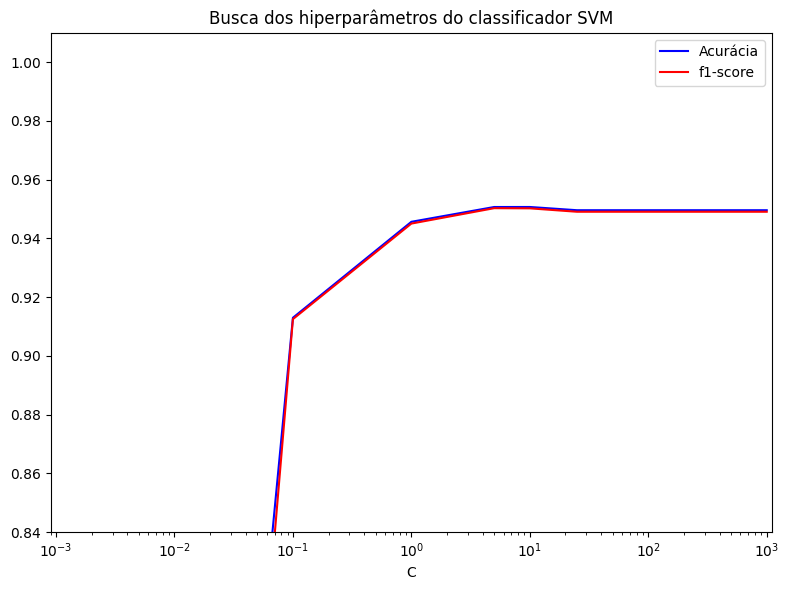

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(perfo_svm.keys(),[perfo_svm[i]['Acurácia'] for i in perfo_svm.keys()],label='Acurácia',c='b')
ax.plot(perfo_svm.keys(),[perfo_svm[i]['f1-score'] for i in perfo_svm.keys()],label='f1-score',c='r')

ax.set_xlabel('C')
ax.set_xscale('log')
ax.set_xlim([0.0009,1100])
ax.set_ylim([0.84,1.01])
ax.legend()
ax.set_title("Busca dos hiperparâmetros do classificador SVM", fontsize=12)

plt.tight_layout()
plt.savefig('svm_search.svg',bbox_inches='tight')
plt.show()

In [5]:
svm_model = SVC(kernel='rbf', C=5, gamma='scale', random_state=0)

start_time = time.time()
svm_model.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"Tempo de treinamento do SVM: {end_time - start_time:.2f} segundos")

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
balanced_accuracy_score_svm = balanced_accuracy_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm, average='macro')

print(f"Acurácia do SVM: {accuracy_svm:.4f}")
print(f"Balanced Accuracy do SVM: {balanced_accuracy_score_svm:.4f}")
print(f"f1-score do SVM: {f1_score_svm:.4f}")
print("\nRelatório de Classificação - SVM:")
print(classification_report(y_test, y_pred_svm))

Tempo de treinamento do SVM: 5.89 segundos
Acurácia do SVM: 0.9514
Balanced Accuracy do SVM: 0.9507
f1-score do SVM: 0.9503

Relatório de Classificação - SVM:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       176
           1       0.99      0.99      0.99       204
           2       0.94      0.97      0.96       177
           3       0.91      0.93      0.92       171
           4       0.95      0.96      0.95       165
           5       0.92      0.95      0.94       151
           6       0.97      0.98      0.98       169
           7       0.96      0.96      0.96       190
           8       0.94      0.88      0.91       173
           9       0.95      0.90      0.92       174

    accuracy                           0.95      1750
   macro avg       0.95      0.95      0.95      1750
weighted avg       0.95      0.95      0.95      1750



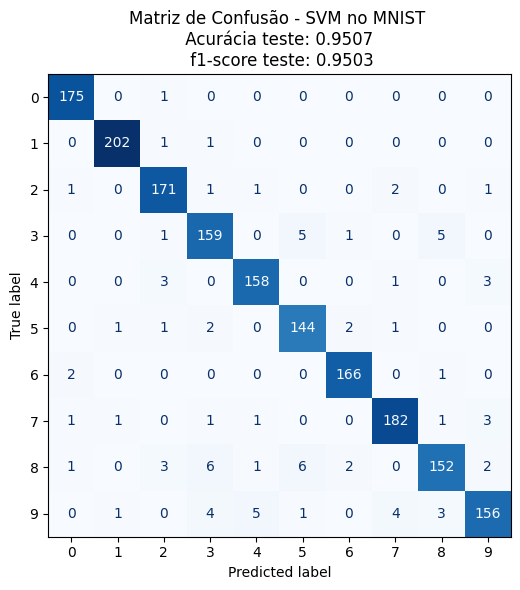

In [6]:
# Matriz de Confusão
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.unique(y))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

disp_svm.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)

plt.title(f"Matriz de Confusão - SVM no MNIST \n Acurácia teste: {balanced_accuracy_score_svm:.4f} \n f1-score teste: {f1_score_svm:.4f}", fontsize=12)

plt.tight_layout()
plt.savefig('svm_conf_mat.svg',bbox_inches='tight')
plt.show()

In [ ]:
layers_set = [(196,),(196,98,),(196,98,49,),
              (392,),(392,196,),(392,196,98,),
              (784,),(784,392,),(784,392,196,)
              ]

perfo_mlp_lists = {}
perfo_mlp = {}

for i in layers_set:
  mlp_model = MLPClassifier(
    hidden_layer_sizes=i,
    max_iter=100,
    tol=1e-8,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=0,
    learning_rate="adaptive",
    learning_rate_init=0.25,
  )

  mlp_model.fit(X_train_scaled, y_train)

  y_pred_mlp = mlp_model.predict(X_test_scaled)

  perfo_mlp_lists[i] = {'Curva de perda':mlp_model.loss_curve_}
  perfo_mlp[i] = {'Acurácia':balanced_accuracy_score(y_test,y_pred_mlp),
                  'f1-score':f1_score(y_test, y_pred_mlp ,average='macro')}
  print(f"Acurácia da Rede Neural (MLP): {perfo_mlp[i]['Acurácia']:.4f}")
  print(f"f1-score da Rede Neural (MLP): {perfo_mlp[i]['f1-score']:.4f}")

Iteration 1, loss = 0.75819597
Iteration 2, loss = 0.23582630
Iteration 3, loss = 0.15050109
Iteration 4, loss = 0.09484768
Iteration 5, loss = 0.06180913
Iteration 6, loss = 0.03954983
Iteration 7, loss = 0.02511014
Iteration 8, loss = 0.01524689
Iteration 9, loss = 0.01167650
Iteration 10, loss = 0.00859376
Iteration 11, loss = 0.00669587
Iteration 12, loss = 0.00536870
Iteration 13, loss = 0.00471326
Iteration 14, loss = 0.00419251
Iteration 15, loss = 0.00403517
Iteration 16, loss = 0.00345970
Iteration 17, loss = 0.00310550
Iteration 18, loss = 0.00281436
Iteration 19, loss = 0.00267787
Iteration 20, loss = 0.00246133
Iteration 21, loss = 0.00229493
Iteration 22, loss = 0.00218559
Iteration 23, loss = 0.00206160
Iteration 24, loss = 0.00193973
Iteration 25, loss = 0.00186246
Iteration 26, loss = 0.00176163
Iteration 27, loss = 0.00168564
Iteration 28, loss = 0.00162176
Iteration 29, loss = 0.00156806
Iteration 30, loss = 0.00150677
Iteration 31, loss = 0.00145858
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.13702976
Iteration 2, loss = 0.27519854
Iteration 3, loss = 0.14756761
Iteration 4, loss = 0.09648966
Iteration 5, loss = 0.06463947
Iteration 6, loss = 0.04427705
Iteration 7, loss = 0.02087608
Iteration 8, loss = 0.01717211
Iteration 9, loss = 0.00653532
Iteration 10, loss = 0.00317253
Iteration 11, loss = 0.00164494
Iteration 12, loss = 0.00122626
Iteration 13, loss = 0.00095733
Iteration 14, loss = 0.00080705
Iteration 15, loss = 0.00073292
Iteration 16, loss = 0.00067992
Iteration 17, loss = 0.00063821
Iteration 18, loss = 0.00060388
Iteration 19, loss = 0.00057764
Iteration 20, loss = 0.00055492
Iteration 21, loss = 0.00053569
Iteration 22, loss = 0.00051751
Iteration 23, loss = 0.00050271
Iteration 24, loss = 0.00049019
Iteration 25, loss = 0.00047803
Iteration 26, loss = 0.00046739
Iteration 27, loss = 0.00045838
Iteration 28, loss = 0.00044938
Iteration 29, loss = 0.00044077
Iteration 30, loss = 0.00043328
Iteration 31, loss = 0.00042621
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.66696003
Iteration 2, loss = 0.53304928
Iteration 3, loss = 0.27592847
Iteration 4, loss = 0.27151046
Iteration 5, loss = 0.18586129
Iteration 6, loss = 0.12807648
Iteration 7, loss = 0.10553021
Iteration 8, loss = 0.08708729
Iteration 9, loss = 0.12408273
Iteration 10, loss = 0.07307242
Iteration 11, loss = 0.05860589
Iteration 12, loss = 0.04456029
Iteration 13, loss = 0.04097373
Iteration 14, loss = 0.04509409
Iteration 15, loss = 0.05151037
Iteration 16, loss = 0.03821971
Iteration 17, loss = 0.05764372
Iteration 18, loss = 0.06900021
Iteration 19, loss = 0.05054481
Iteration 20, loss = 0.04063047
Iteration 21, loss = 0.02852050
Iteration 22, loss = 0.04090201
Iteration 23, loss = 0.02461255
Iteration 24, loss = 0.02849487
Iteration 25, loss = 0.03650441
Iteration 26, loss = 0.03383012
Iteration 27, loss = 0.01572486
Iteration 28, loss = 0.01361159
Iteration 29, loss = 0.00850463
Iteration 30, loss = 0.00599040
Iteration 31, loss = 0.00893627
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.69742563
Iteration 2, loss = 0.22900599
Iteration 3, loss = 0.13622354
Iteration 4, loss = 0.08043288
Iteration 5, loss = 0.05693434
Iteration 6, loss = 0.03073841
Iteration 7, loss = 0.01722500
Iteration 8, loss = 0.01351885
Iteration 9, loss = 0.00951301
Iteration 10, loss = 0.00677107
Iteration 11, loss = 0.00547148
Iteration 12, loss = 0.00473721
Iteration 13, loss = 0.00406248
Iteration 14, loss = 0.00367904
Iteration 15, loss = 0.00332572
Iteration 16, loss = 0.00302814
Iteration 17, loss = 0.00278880
Iteration 18, loss = 0.00260838
Iteration 19, loss = 0.00244720
Iteration 20, loss = 0.00229121
Iteration 21, loss = 0.00214539
Iteration 22, loss = 0.00203944
Iteration 23, loss = 0.00194038
Iteration 24, loss = 0.00183392
Iteration 25, loss = 0.00175955
Iteration 26, loss = 0.00167633
Iteration 27, loss = 0.00161270
Iteration 28, loss = 0.00155701
Iteration 29, loss = 0.00148643
Iteration 30, loss = 0.00143832
Iteration 31, loss = 0.00139001
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.02019853
Iteration 2, loss = 0.23553270
Iteration 3, loss = 0.12105146
Iteration 4, loss = 0.07428942
Iteration 5, loss = 0.04836100
Iteration 6, loss = 0.02847935
Iteration 7, loss = 0.01799388
Iteration 8, loss = 0.01906554
Iteration 9, loss = 0.00986241
Iteration 10, loss = 0.00503440
Iteration 11, loss = 0.00444533
Iteration 12, loss = 0.00150558
Iteration 13, loss = 0.00091075
Iteration 14, loss = 0.00076308
Iteration 15, loss = 0.00068829
Iteration 16, loss = 0.00065536
Iteration 17, loss = 0.00062182
Iteration 18, loss = 0.00059631
Iteration 19, loss = 0.00057673
Iteration 20, loss = 0.00055951
Iteration 21, loss = 0.00054443
Iteration 22, loss = 0.00053226
Iteration 23, loss = 0.00052392
Iteration 24, loss = 0.00051246
Iteration 25, loss = 0.00050383
Iteration 26, loss = 0.00049628
Iteration 27, loss = 0.00048877
Iteration 28, loss = 0.00048293
Iteration 29, loss = 0.00047771
Iteration 30, loss = 0.00047167
Iteration 31, loss = 0.00046665
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.95514617
Iteration 2, loss = 0.79452154
Iteration 3, loss = 0.31474083
Iteration 4, loss = 0.19874424
Iteration 5, loss = 0.12769780
Iteration 6, loss = 0.11215129
Iteration 7, loss = 0.09617366
Iteration 8, loss = 0.05922848
Iteration 9, loss = 0.05961298
Iteration 10, loss = 0.04927306
Iteration 11, loss = 0.05393444
Iteration 12, loss = 0.05827380
Iteration 13, loss = 0.03500622
Iteration 14, loss = 0.02447143
Iteration 15, loss = 0.02574254
Iteration 16, loss = 0.01948801
Iteration 17, loss = 0.03474218
Iteration 18, loss = 0.02795009
Iteration 19, loss = 0.02023621
Iteration 20, loss = 0.04432175
Iteration 21, loss = 0.03121062
Iteration 22, loss = 0.03446374
Iteration 23, loss = 0.02717371
Iteration 24, loss = 0.02315847
Iteration 25, loss = 0.01425884
Iteration 26, loss = 0.01196374
Iteration 27, loss = 0.01083982
Iteration 28, loss = 0.00670272
Iteration 29, loss = 0.00296164
Iteration 30, loss = 0.00261681
Iteration 31, loss = 0.00177360
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.69929094
Iteration 2, loss = 0.20926101
Iteration 3, loss = 0.13028160
Iteration 4, loss = 0.07398982
Iteration 5, loss = 0.04048613
Iteration 6, loss = 0.02381756
Iteration 7, loss = 0.01572447
Iteration 8, loss = 0.01085820
Iteration 9, loss = 0.00840384
Iteration 10, loss = 0.00638789
Iteration 11, loss = 0.00520230
Iteration 12, loss = 0.00447859
Iteration 13, loss = 0.00406140
Iteration 14, loss = 0.00372362
Iteration 15, loss = 0.00328763
Iteration 16, loss = 0.00298526
Iteration 17, loss = 0.00277416
Iteration 18, loss = 0.00259997
Iteration 19, loss = 0.00239990
Iteration 20, loss = 0.00230987
Iteration 21, loss = 0.00218640
Iteration 22, loss = 0.00204207
Iteration 23, loss = 0.00194780
Iteration 24, loss = 0.00186483
Iteration 25, loss = 0.00177517
Iteration 26, loss = 0.00171071
Iteration 27, loss = 0.00166369
Iteration 28, loss = 0.00158427
Iteration 29, loss = 0.00152446
Iteration 30, loss = 0.00148381
Iteration 31, loss = 0.00142977
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.96331242
Iteration 2, loss = 0.23007042
Iteration 3, loss = 0.12924522
Iteration 4, loss = 0.06772105
Iteration 5, loss = 0.03863167
Iteration 6, loss = 0.01964277
Iteration 7, loss = 0.00815130
Iteration 8, loss = 0.00432724
Iteration 9, loss = 0.00198400
Iteration 10, loss = 0.00126537
Iteration 11, loss = 0.00106372
Iteration 12, loss = 0.00096294
Iteration 13, loss = 0.00089730
Iteration 14, loss = 0.00084745
Iteration 15, loss = 0.00081099
Iteration 16, loss = 0.00078162
Iteration 17, loss = 0.00075524
Iteration 18, loss = 0.00073279
Iteration 19, loss = 0.00071773
Iteration 20, loss = 0.00069920
Iteration 21, loss = 0.00068637
Iteration 22, loss = 0.00067401
Iteration 23, loss = 0.00066286
Iteration 24, loss = 0.00065252
Iteration 25, loss = 0.00064348
Iteration 26, loss = 0.00063577
Iteration 27, loss = 0.00062785
Iteration 28, loss = 0.00062031
Iteration 29, loss = 0.00061489
Iteration 30, loss = 0.00060838
Iteration 31, loss = 0.00060230
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.85926657
Iteration 2, loss = 0.59527083
Iteration 3, loss = 0.33688768
Iteration 4, loss = 0.15880525
Iteration 5, loss = 0.10045753
Iteration 6, loss = 0.07277470
Iteration 7, loss = 0.05994307
Iteration 8, loss = 0.03254653
Iteration 9, loss = 0.03472530
Iteration 10, loss = 0.02869909
Iteration 11, loss = 0.05355264
Iteration 12, loss = 0.03726050
Iteration 13, loss = 0.05683169
Iteration 14, loss = 0.02615584
Iteration 15, loss = 0.02636954
Iteration 16, loss = 0.03055302
Iteration 17, loss = 0.02152909
Iteration 18, loss = 0.03774894
Iteration 19, loss = 0.01249072
Iteration 20, loss = 0.00631680
Iteration 21, loss = 0.03709674
Iteration 22, loss = 0.02978152
Iteration 23, loss = 0.01223056
Iteration 24, loss = 0.01613619
Iteration 25, loss = 0.02053636
Iteration 26, loss = 0.02214451
Iteration 27, loss = 0.01506618
Iteration 28, loss = 0.01205902
Iteration 29, loss = 0.00945486
Iteration 30, loss = 0.00824807
Iteration 31, loss = 0.00639713
Training loss did

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


/tmp/ipython-input-11-3916741276.py:5: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(range(1,101),perfo_mlp_lists[i]['Curva de perda'],label=i,c=c[count])
/tmp/ipython-input-11-3916741276.py:5: MatplotlibDeprecationWarning: Passing label as a length 3 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(range(1,101),perfo_mlp_lists[i]['Curva de perda'],label=i,c=c[count])


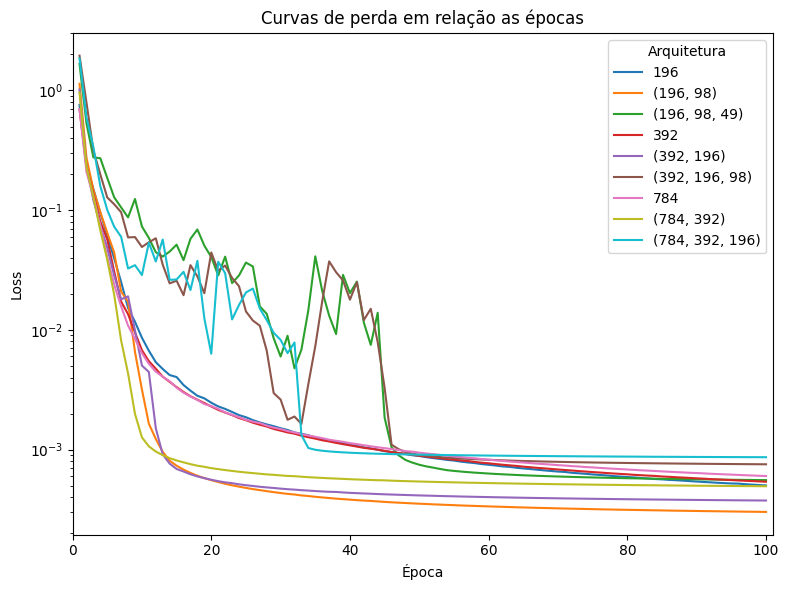

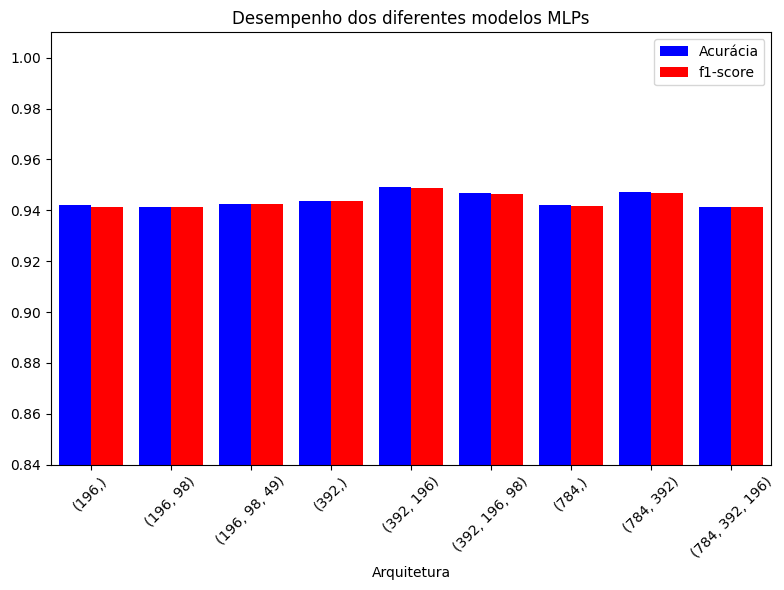

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
c = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:olive','tab:cyan']
count = 0
for i in perfo_mlp_lists.keys():
  ax.plot(range(1,101),perfo_mlp_lists[i]['Curva de perda'],label=i,c=c[count])
  count += 1

ax.set_xlabel('Época')
ax.set_ylabel('Loss')
ax.set_xlim([0,101])
ax.set_yscale('log')
ax.legend(title='Arquitetura')
ax.set_title("Curvas de perda em relação as épocas", fontsize=12)

plt.tight_layout()
plt.savefig('mlps_epochs_loss.svg',bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
c = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:olive','tab:cyan']
count = 0
for i in perfo_mlp.keys():
  if count == 0:
    plt.bar(count+0.3,perfo_mlp[i]['Acurácia'],width=0.4,label='Acurácia',color ='b')
    plt.bar(count+0.7,perfo_mlp[i]['f1-score'],width=0.4,label='f1-score',color ='r')
  else:
    plt.bar(count+0.3,perfo_mlp[i]['Acurácia'],width=0.4,color ='b')
    plt.bar(count+0.7,perfo_mlp[i]['f1-score'],width=0.4,color ='r')
  count += 1

ax.set_xlabel('Arquitetura')
ax.set_xticks(np.array(range(count))+0.5,perfo_mlp.keys(),rotation=45)
ax.set_xlim([0,9])
ax.set_ylim([0.84,1.01])
ax.legend()
ax.set_title("Desempenho dos diferentes modelos MLPs", fontsize=12)

plt.tight_layout()
plt.savefig('mlps_perfo.svg',bbox_inches='tight')
plt.show()

In [7]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(392,196,),
    max_iter=100,
    alpha=1e-4,
    tol=1e-8,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate="adaptive",
    learning_rate_init=0.25,
)

start_time = time.time()
mlp_model.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"Tempo de treinamento da MLP: {end_time - start_time:.2f} segundos")

y_pred_mlp = mlp_model.predict(X_test_scaled)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
balanced_accuracy_score_mlp = accuracy_score(y_test, y_pred_mlp)
f1_score_mlp = f1_score(y_test, y_pred_mlp, average='macro')
print(f"Acurácia da Rede Neural (MLP): {accuracy_mlp:.4f}")
print(f"Balanced Accuracy da Rede Neural (MLP): {balanced_accuracy_score_mlp:.4f}")
print(f"f1-score da Rede Neural (MLP): {f1_score_mlp:.4f}")
print("\nRelatório de Classificação - MLP:")
print(classification_report(y_test, y_pred_mlp))

Iteration 1, loss = 1.13599625
Iteration 2, loss = 0.27080173
Iteration 3, loss = 0.13771799
Iteration 4, loss = 0.07858612
Iteration 5, loss = 0.05254795
Iteration 6, loss = 0.02411684
Iteration 7, loss = 0.01182838
Iteration 8, loss = 0.01521557
Iteration 9, loss = 0.01533271
Iteration 10, loss = 0.00517183
Iteration 11, loss = 0.00285080
Iteration 12, loss = 0.00197836
Iteration 13, loss = 0.00102070
Iteration 14, loss = 0.00082410
Iteration 15, loss = 0.00073897
Iteration 16, loss = 0.00068561
Iteration 17, loss = 0.00064968
Iteration 18, loss = 0.00062592
Iteration 19, loss = 0.00059970
Iteration 20, loss = 0.00058131
Iteration 21, loss = 0.00056523
Iteration 22, loss = 0.00055078
Iteration 23, loss = 0.00053891
Iteration 24, loss = 0.00052797
Iteration 25, loss = 0.00051815
Iteration 26, loss = 0.00050953
Iteration 27, loss = 0.00050191
Iteration 28, loss = 0.00049548
Iteration 29, loss = 0.00048867
Iteration 30, loss = 0.00048333
Iteration 31, loss = 0.00047769
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


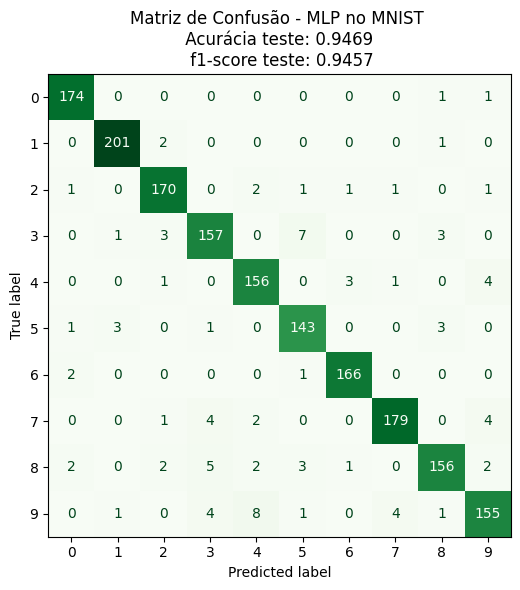

In [13]:
# Matriz de Confusão
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=np.unique(y))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

disp_mlp.plot(cmap=plt.cm.Greens, ax=ax, colorbar=False)

plt.title(f"Matriz de Confusão - MLP no MNIST \n Acurácia teste: {balanced_accuracy_score_mlp:.4f} \n f1-score teste: {f1_score_mlp:.4f}", fontsize=12)

plt.tight_layout()
plt.savefig('mlp_conf_mat.svg',bbox_inches='tight')
plt.show()